In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

import os
for dirname, _, filenames in os.walk('file.csv/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('file.csv')
data = data.drop(columns=["Unnamed"])  # Drop unnecessary columns
X = data.drop(columns=['y']).values  
y = data['y'].values  
X = X.reshape(X.shape[0], X.shape[1], 1) 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y - 1) 
cols = data.drop(columns=['y']).columns.tolist() 
X_df = data.drop(columns=['y'])  
print(X_df.describe())  

                 X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.033

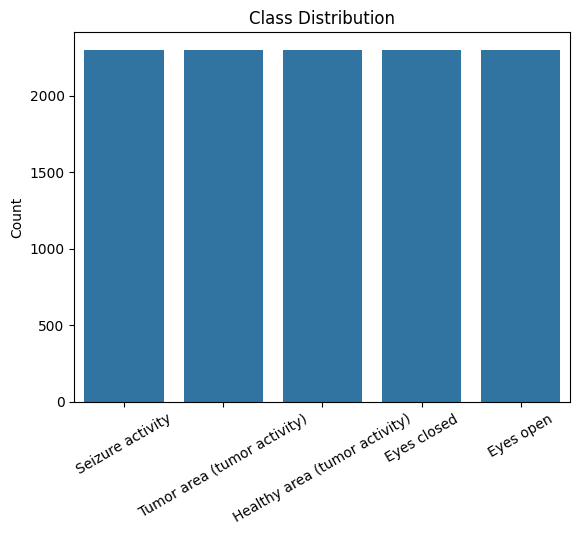

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
labels = [
    "Seizure activity",
    "Tumor area (tumor activity)",
    "Healthy area (tumor activity)",
    "Eyes closed",
    "Eyes open"
]

# Count occurrences for each class
class_counts = np.sum(y, axis=0)  # Sum along columns to get class-wise counts

# Plot the counts
sns.barplot(x=labels, y=class_counts)
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Convert one-hot encoded labels to class indices (0 to 4)
y = np.argmax(y, axis=1)  # Converts from one-hot to integer labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Verify the shapes of the splits
print("Training set shape (X):", X_train.shape, "Training labels shape (y):", y_train.shape)
print("Test set shape (X):", X_test.shape, "Test labels shape (y):", y_test.shape)


Training set shape (X): (9200, 178, 1) Training labels shape (y): (9200,)
Test set shape (X): (2300, 178, 1) Test labels shape (y): (2300,)


In [5]:
print(y)

[3 0 4 ... 4 2 3]


In [6]:
print(X_train.shape)
print(X_test.shape)

(9200, 178, 1)
(2300, 178, 1)


In [7]:
# Reshape training and test features for CNN input (add channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (samples, features, channels)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)      # (samples, features, channels)

# Verify the reshaped dimensions
print("Training set shape after reshaping:", X_train.shape)
print("Test set shape after reshaping:", X_test.shape)


Training set shape after reshaping: (9200, 178, 1)
Test set shape after reshaping: (2300, 178, 1)


In [8]:
import pandas as pd

# Reshape and convert X_train and X_test to DataFrames
X_train = pd.DataFrame(X_train.reshape(X_train.shape[0], X_train.shape[1]), columns=cols)
X_test = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[1]), columns=cols)

# Verify the DataFrame shapes and columns
print("X_train shape after conversion to DataFrame:", X_train.shape)
print("X_test shape after conversion to DataFrame:", X_test.shape)
print("X_train columns:", X_train.columns.tolist())


X_train shape after conversion to DataFrame: (9200, 178)
X_test shape after conversion to DataFrame: (2300, 178)
X_train columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', '

In [9]:
# Ensure X_train is a NumPy array before reshaping
X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train

# Reshape X_train and convert to DataFrame with the appropriate column names
X_train_df = pd.DataFrame(X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1]), columns=cols)

# Display the summary statistics of the training data
print(X_train_df.describe())


                X1           X2           X3           X4           X5  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000   
mean    -12.265978   -11.566957   -10.624783    -9.381522    -8.028261   
std     169.190026   168.884552   165.498183   162.298170   160.950863   
min   -1839.000000 -1838.000000 -1835.000000 -1845.000000 -1791.000000   
25%     -54.000000   -54.250000   -54.000000   -54.000000   -54.000000   
50%      -8.000000    -7.000000    -7.000000    -7.000000    -8.000000   
75%      35.000000    36.000000    36.000000    36.000000    35.000000   
max    1726.000000  1713.000000  1697.000000  1612.000000  1518.000000   

                X6           X7           X8           X9          X10  ...  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000  ...   
mean     -6.863478    -6.148804    -6.076630    -5.827391    -5.324891  ...   
std     160.056401   160.413283   162.257954   162.758628   159.977657  ...   
min   -1757.00000

In [10]:
print(f"Mean of X_train: {np.mean(X_train, axis=0)}")
print(f"Standard Deviation of X_train: {np.std(X_train,axis=0)}")


Mean of X_train: X1     -12.265978
X2     -11.566957
X3     -10.624783
X4      -9.381522
X5      -8.028261
          ...    
X174   -13.169565
X175   -12.691848
X176   -12.313587
X177   -12.109022
X178   -11.865435
Length: 178, dtype: float64
Standard Deviation of X_train: X1      169.180831
X2      168.875374
X3      165.489189
X4      162.289349
X5      160.942116
           ...    
X174    169.358827
X175    165.570873
X176    164.402239
X177    165.202286
X178    166.668131
Length: 178, dtype: float64


In [11]:
from tensorflow.keras.optimizers import Adam


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Initialize the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# 2nd Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# 3rd Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# 4th Convolutional Layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# 5th Convolutional Layer
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Fully connected (Dense) Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer (Multi-class classification)
model.add(Dense(5, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)


C:\Users\aarch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.2846 - loss: 2.0346 - val_accuracy: 0.5409 - val_loss: 1.1355 - learning_rate: 5.0000e-04
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5240 - loss: 1.1392 - val_accuracy: 0.5800 - val_loss: 1.0098 - learning_rate: 5.0000e-04
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5705 - loss: 0.9857 - val_accuracy: 0.6357 - val_loss: 0.7683 - learning_rate: 5.0000e-04
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6225 - loss: 0.7997 - val_accuracy: 0.6713 - val_loss: 0.6998 - learning_rate: 5.0000e-04
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6657 - loss: 0.7374 - val_accuracy: 0.6943 - val_loss: 0.6525 - learning_rate: 5.0000e-04
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6742 - loss: 0.6763 - val_accuracy: 0.6765 - val_loss: 0.6493 - learning_rate: 5.0000e-04
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc

In [13]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Predict using the trained model
y_pred_cnn = model.predict(X_test)

# Get the class with the highest probability for each sample
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)  # Convert probabilities to class labels

# Optional: If you want to print the predicted labels
print(f'Predicted labels: {y_pred_cnn[:10]}')  # Display the first 10 predictions


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7488 - loss: 0.5611
Test Accuracy: 0.7339130640029907
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Predicted labels: [1 0 2 2 3 4 3 4 4 2]


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f'CNN Model Accuracy: {accuracy_cnn}')

# Classification report for multi-class classification
print(classification_report(y_test, 
                            y_pred_cnn, target_names=[str(i) for i in range(5)]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(conf_matrix)


CNN Model Accuracy: 0.7339130434782609
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       446
           1       0.69      0.34      0.46       460
           2       0.53      0.75      0.62       430
           3       0.86      0.77      0.81       475
           4       0.71      0.83      0.76       489

    accuracy                           0.73      2300
   macro avg       0.75      0.73      0.72      2300
weighted avg       0.75      0.73      0.72      2300

Confusion Matrix:
[[439   4   1   2   0]
 [ 18 156 254   5  27]
 [  0  58 324   7  41]
 [  7   2   3 365  98]
 [  1   5  33  46 404]]


In [15]:
print(f'Accuracy score: {accuracy_cnn:.4f}')

Accuracy score: 0.7339


In [16]:
print(y_test)
print(y_pred_cnn)

[1 0 2 ... 3 3 0]
[1 0 2 ... 3 3 0]


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 176, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 88, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 86, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 41, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 18, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 9, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 7, 512)              │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 3, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,162,129 (8.25 MB)

 Trainable params: 720,709 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,441,420 (5.50 MB)

In [ ]:
import seaborn as sn
cf_matrix = confusion_matrix(y_test, y_pred_cnn)
print(cf_matrix)
plt.figure(figsize=(4, 3))
plt.title('Confusion Matrix for Seizure Dataset (CNN)')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_cnn))